In [80]:
import pandas as pd
from sklearn.datasets import load_iris

In [81]:
iris = load_iris()

In [82]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [83]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [84]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [85]:
df = pd.DataFrame(iris.data , columns  = iris.feature_names)

In [86]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [87]:
df['target'] = iris.target

In [88]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [90]:
df['Flower_Name'] = df.target.apply(lambda x:iris.target_names[x])

In [91]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [92]:
df0 = df[:50] #Setosa
df1 = df[50:100] #versicolor
df2 = df[100:150] #virginica

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

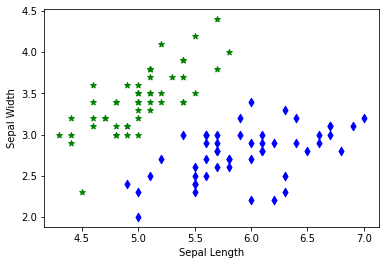

In [94]:
plt.xlabel('Sepal Length')
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'] , df0['sepal width (cm)'] , color = 'green' , marker = "*")
plt.scatter(df1['sepal length (cm)'] , df1['sepal width (cm)'] , color = 'blue' , marker = "d")


**After Data Visualization and Data Cleaning you will be able to choose which method you can use here we can use normal svm not kernal**

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df.drop(["target" , "Flower_Name"] , axis = 'columns')
y = df.target

In [97]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 42 , test_size = 0.2)

In [98]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [99]:
len(X_test)

30

In [100]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int32

In [101]:
from sklearn.svm import SVC
model = SVC()

In [102]:
model.fit(X_train,y_train)

SVC()

In [103]:
model.score(X_test , y_test)

1.0

In [104]:
model.predict([[6.7,3.1,4.4,1.4]])

array([1])

**Using Regularization**

In [105]:
model_c = SVC(C=1)
model_c.fit(X_train , y_train)

SVC(C=1)

In [106]:
model_c.score(X_test , y_test)

1.0

**Using Gamma**

In [107]:
model_g = SVC(gamma=1)
model_g.fit(X_train , y_train)
model_g.score(X_test , y_test)

1.0